# Sentiment Analysis

1. Scaled representation of : `pos`, `neg`, `neutral` [done]
2. Aspect-based analysis: which particular aspects or features are mentioned in a positive, neutral, or negative way. []
3. Semantic Clustering []
4. Feature Analysis []
5. Aspect Similaarity co-occurance
6. Emotion aspect co-occurance

   ======

1. Overall sentiment [done]
2. Sentiment by floor and space [done]
3. Sentiment by type of space i.e. group vs individual [done]
4. Sentiment by topic

In [92]:
import string

import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

import nltk
# from nltk.corpus import stopwords
# from nltk.corpus import wordnet
# from nltk.tokenize import word_tokenize, sent_tokenize
# from nltk.stem.wordnet import WordNetLemmatizer 

# import stanfordnlp

from transformers import pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from nltk.sentiment import SentimentIntensityAnalyzer
from pyabsa import ATEPCCheckpointManager


In [2]:
# Settings
# stanfordnlp.download('en')
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')

/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.8/lib/python3.8/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=1>
  _warn(f"unclosed running multiprocessing pool {self!r}",


In [3]:
drop_col_emo=['occupation', 'usage', 'recruitment']

# Students at LAB42

In [26]:
emo_sl42 = pd.read_csv('data/lab42_cleaned_data.csv', index_col=0).drop(columns = drop_col_emo, axis=1).dropna(subset=['emotion'])

## Emotions: LLM-based Overall Sentiment Analysis

In [27]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
sentiment_task = pipeline("sentiment-analysis", model=MODEL, tokenizer=MODEL)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [28]:
def sentiment_analysis(sentence):
    return sentiment_task(sentence, top_k=3)

def assign_scores(idx):
    emo_sl42.at[idx, 'positive'] = next(item for item in emo_sl42['senti'][idx] if item['label'] == 'positive')['score']
    emo_sl42.at[idx, 'negative'] = next(item for item in emo_sl42['senti'][idx] if item['label'] == 'negative')['score']
    emo_sl42.at[idx, 'neutral'] = next(item for item in emo_sl42['senti'][idx] if item['label'] == 'neutral')['score']

def plot_sentiment_analysis(df, label):
    sns.countplot(y=df[label + "_label"], 
                  palette=['#b2d8d8',"#008080", '#db3d13'],
                  order=["positive", "negative", "neutral"])
    plt.ylabel("Overall Sentiment for Emotion Responses")
    plt.xlabel("Count")
    plt.savefig('plots/sentiment-analysis/students-lab42/' + label + '-llm-sentiment-count.jpg',
                dpi=300, bbox_inches='tight')

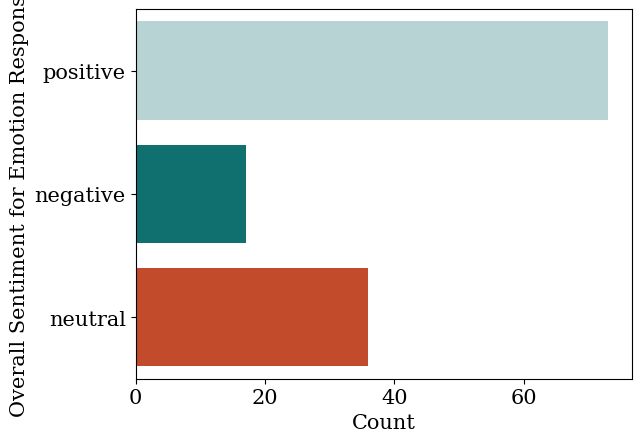

In [29]:
# 1. Calculate sentiment analysis on each emotion statement:
emo_sl42['senti'] = emo_sl42['emotion'].apply(sentiment_analysis)

# 2. Sort Sentiment Scores into Independent Columns
for idx in emo_sl42.index:
    assign_scores(idx)

# 3. Drop Unecessary Columns
emo_sl42 = emo_sl42.drop(columns=['senti'])

# 4. Calculate the dominant overall sentiment of the response
emo_sl42['emo_label'] = emo_sl42[['positive', 'negative', 'neutral']].idxmax(axis=1)

# 5. Plot the overall sentiments distribution
plot_sentiment_analysis(emo_sl42, 'emo')

## Comfort: LLM-based Overall Sentiment Analysis

In [33]:
comfort_sl42 = pd.read_csv('data/lab42_cleaned_data.csv', index_col=0).drop(columns = drop_col_emo, axis=1).dropna(subset=['comfort'])

In [37]:
def sentiment_analysis(sentence):
    return sentiment_task(sentence, top_k=3)

def assign_scores(idx):
    comfort_sl42.at[idx, 'positive'] = next(item for item in comfort_sl42['senti'][idx] if item['label'] == 'positive')['score']
    comfort_sl42.at[idx, 'negative'] = next(item for item in comfort_sl42['senti'][idx] if item['label'] == 'negative')['score']
    comfort_sl42.at[idx, 'neutral'] = next(item for item in comfort_sl42['senti'][idx] if item['label'] == 'neutral')['score']

def plot_sentiment_analysis(df, label):
    sns.countplot(y=df[label + "_label"], 
                  palette=['#b2d8d8',"#008080", '#db3d13'],
                  order=["positive", "negative", "neutral"])
    plt.ylabel("Overall Sentiment for Comfort Responses")
    plt.xlabel("Count")
    plt.savefig('plots/sentiment-analysis/students-lab42/' + label + '-llm-sentiment-count.jpg',
                dpi=300, bbox_inches='tight')

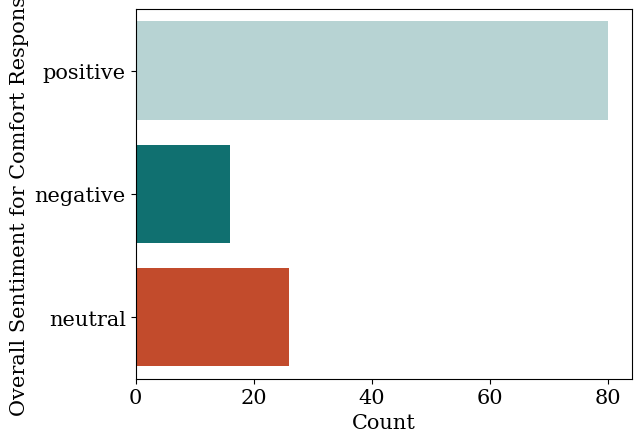

In [38]:
# 1. Calculate sentiment analysis on each emotion statement:
comfort_sl42['senti'] = comfort_sl42['comfort'].apply(sentiment_analysis)

# 2. Sort Sentiment Scores into Independent Columns
for idx in comfort_sl42.index:
    assign_scores(idx)

# 3. Drop Unecessary Columns
comfort_sl42 = comfort_sl42.drop(columns=['senti'])

# 4. Calculate the dominant overall sentiment of the response
comfort_sl42['comfort_label'] = comfort_sl42[['positive', 'negative', 'neutral']].idxmax(axis=1)

# 5. Plot the overall sentiments distribution
plot_sentiment_analysis(comfort_sl42, 'comfort')

# Comparing Emotion and Comfort Sentiments
How do positive emotion labels impact comfort? What about negative emo labels? Is there any relationship between the two?

In [140]:
df = pd.read_csv('data/lab42_cleaned_data.csv', index_col=0)

In [141]:
df = df[["emotion", "comfort"]].dropna(how="any")

In [142]:
def sentiment_analysis(sentence):
    return sentiment_task(sentence)
    
df_senti = df.applymap(sentiment_analysis)

In [149]:
df.head()

,emotion,comfort
1,I always feel a bit zen when I am here. It’s q...,"The light in the offices is perfect, as well a..."
2,"Cold, a bit down","Temperature (it’s too cold), lack of light (bu..."
3,Calm,Comfortable temperature and pleasant lighting....
4,"Hungry, a bit cold","Cold, quiet, well lit"
5,Stressed about my exams but I am happy in this...,Usually it is really nice and comfortably warm...


In [156]:
df_senti = df_senti.rename(columns={'emotion':'emo_label',
                         'comfort': 'comfort_label'})

In [158]:
df = df_senti.join(df)

In [160]:
df.head()

,emo_label,comfort_label,emotion,comfort
1,"[{'label': 'positive', 'score': 0.605559706687...","[{'label': 'positive', 'score': 0.964159250259...",I always feel a bit zen when I am here. It’s q...,"The light in the offices is perfect, as well a..."
2,"[{'label': 'negative', 'score': 0.502305984497...","[{'label': 'negative', 'score': 0.876734495162...","Cold, a bit down","Temperature (it’s too cold), lack of light (bu..."
3,"[{'label': 'neutral', 'score': 0.5071429610252...","[{'label': 'positive', 'score': 0.978891074657...",Calm,Comfortable temperature and pleasant lighting....
4,"[{'label': 'negative', 'score': 0.540023744106...","[{'label': 'neutral', 'score': 0.6064178943634...","Hungry, a bit cold","Cold, quiet, well lit"
5,"[{'label': 'positive', 'score': 0.888618528842...","[{'label': 'positive', 'score': 0.888318836688...",Stressed about my exams but I am happy in this...,Usually it is really nice and comfortably warm...


In [161]:
def assign_labels(idx):
    # print(idx)
    # print(df['emotion'][idx][0]['label'])
    df['emo_label'][idx] = df['emo_label'][idx][0]['label']
    df['comfort_label'][idx] =  df['comfort_label'][idx][0]['label']

In [162]:
for idx in df.index:
   assign_labels(idx)

In [164]:
df[['emo_label', 'comfort_label']] = df[['emo_label', 'comfort_label']].replace({'positive': 1, 
                                                                                 'negative': -1,
                                                                                 'neutral': 0})

In [188]:
df[['emo_label', 'comfort_label']].value_counts()

emo_label  comfort_label
 1          1               52
 0          1               22
 1          0               16
-1         -1                6
            1                6
 0         -1                6
            0                5
-1          0                4
 1         -1                4
dtype: int64

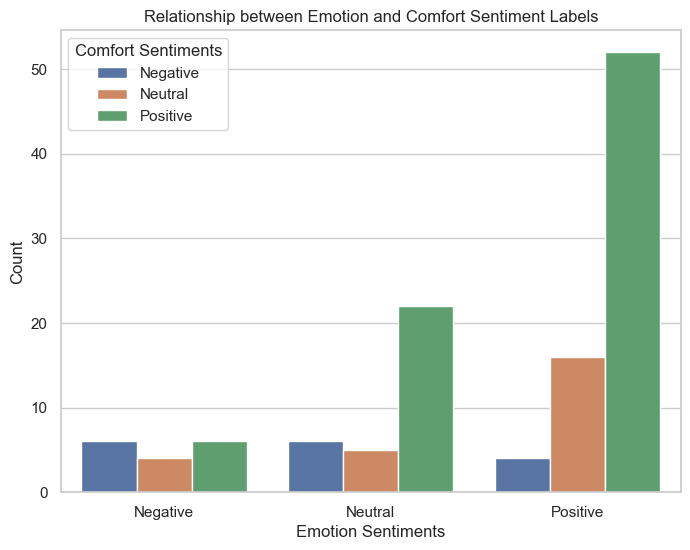

In [217]:
grouped = df.groupby(['emo_label', 'comfort_label']).size().unstack(fill_value=0)

# Reset the index to use 'Emotion' as a column
grouped = grouped.reset_index()

# Melt the data to create a tidy format for Seaborn
melted = pd.melt(grouped,
                 id_vars=['emo_label'],
                 value_vars=[-1, 0, 1],
                 var_name='comfort_label',
                 value_name='Count')

# Map comfort values to colors
comfort_colors = {-1: 'red', 0: 'gray', 1: 'green'}
melted['Comfort_color'] = melted['comfort_label'].map(comfort_colors)

labels = ['Negative', 'Neutral', 'Positive']

# Create a grouped bar plot using Seaborn
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=melted, x='emo_label', y='Count', hue='comfort_label')
plt.xlabel('Emotion Sentiments')
ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
plt.ylabel('Count')
plt.title('Relationship between Emotion and Comfort Sentiment Labels')

h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title='Comfort Sentiments')
plt.savefig('plots/emotion-vs-comf.jpg',
            dpi=300, bbox_inches='tight')

##@ Overview of Relationship between Emotions and Comfort
Positive emotion --> positive comfort (N=52) 42%

Positive emotion --> neutral comfort (N=16) 13%

Neutral emotion --> positive comfort (N=22) 18%

Very rare that positive emotions --> negative comfort (N=4) 0.03%

Very rare that negative emotions --> positive comfort (N=4) 0.03%

Very rare that neutral emotions --> negative or neutral comfort (N=6/5)

In [184]:
for row in df[(df['emo_label']== -1) & (df['comfort_label'] == 1)].comfort:
    print("*: ", row)

*:  i like the fact that there is some sort of background noise (which isnt the case in the library rooms) and the chairs are really comfortable
*:  I like the windows providing natural light. Temperature is okay.
*:  Temperature good but should not be colder. Not a lot of noise some peeps are talking behind. Air quality is superb, no just fine dont know. Light is ok
*:  Everything alright
*:  All factors good. The sunlight is blidndinh me but also I want it - maybe u have a solution for semi closing manually adaptable blinds
*:  There is ample lighting, air is a little stuffy, temperature is decent.


In [185]:
for row in df[(df['emo_label']== 1) & (df['comfort_label'] == -1)].comfort:
    print("*: ", row)

*:  Good, but Please stop closing the blinds ! The whole point of this room is that it’s so nicely lit so it’s very sad when the blinds get closed and it becomes as dark and gloomy as any other study room :(
*:  All is good, only a high sound is annoying. I think from te beamer.  And I'm not sure If you should be silent in this room or not
*:  I think the temperature is a bit too low, I tend to get cold feet and hands quite quickly after studying a while in here. Concerning light and noise, it is just right, I don’t have any remarks here. I do think it would feel a little more comfortable with some more plants littered around the place!
*:  Bit to much noise. And i am uncomfortable with my legs because of the high chairs


In [186]:
for row in df[(df['emo_label']== 0) & (df['comfort_label'] == -1)].comfort:
    print("*: ", row)

*:  Its cold and kind of noisy
*:  The irregularity of the automatic sun blockers often make it very sunny inside, making it uncomfortable to study by the window (light blocking the screen. Air quality is slightly worse than in the open/staircase area. Besides that, very comfortable in all other aspects.
*:  It is very cold here and not so light
*:  Chairs are not very comfortable and it's loud when classes end. 
*:  My chair makes my back hurt and I the lack chalkboards gives me existential pain. 7/10
*:  Freezing cold, full noise


## Lexicon-based Analysis using VADER
Here we are interested in the rule-based analysis. The compound score is computed by summing the 
valence scores of each word in the lexicon, adjusted according to the rules, and then normalized 
to be between -1 (most extreme negative) and +1 (most extreme positive). 
It is a 'normalized, weighted composite score.

In [ ]:
def vader_lexicon_analysis(df, label):
    analyzer = SentimentIntensityAnalyzer()
    df[label + '-composite-score'] = df[label].apply(lambda x: analyzer.polarity_scores(str(x))['compound'])
    
    return df 

def plot_lexicon_analysis(df, label):
    sns.boxplot(x='floor', y='emotion-composite-score', data=df)
    plt.xlabel("Floor")
    plt.ylabel("Lexicon-based Normalised Weighted Composite Score \n (1 = Most Positive; 0 = Neutral; -1 = Most Negative)")
    plt.tick_params(bottom=False)
    plt.axhline(0, ls='--', c = 'grey')
    plt.savefig('plots/sentiment-analysis/students-lab42/' +
                label +
                '-vader-lexicon-composite.jpg',
                dpi=300,
                bbox_inches='tight')

    plt.clf()

    sns.displot(x='emotion-composite-score', kde=True, 
                height=4,
                aspect=1.5,
                data=emo_sl42)
    plt.xlabel("Lexicon-Based Normalised Weighted Composite Scores for Sentiments \n (1 = Most Positive; 0 = Neutral; -1 = Most Negative)")
    plt.tick_params(bottom=False)
    plt.axhline(0, ls='--', c = 'grey')
    plt.savefig('plots/sentiment-analysis/students-lab42/' +
                label +
                '-distribution-lexicon-composite.jpg',
                dpi=300,
                bbox_inches='tight')
    plt.clf()

    sns.displot(x='emotion-composite-score', y='emo_label',
                binwidth=(.2, .1),
                height=4,
                aspect=1.5,
                data=emo_sl42)
    plt.xlabel("Lexicon-Based Normalised Weighted Composite Scores for Sentiments \n (1 = Most Positive; 0 = Neutral; -1 = Most Negative)")
    plt.ylabel("LLM Generated Sentiment Labels")
    plt.tick_params(bottom=False)
    plt.savefig('plots/sentiment-analysis/students-lab42/' +
                label +
                '-vader-vs-lexicon-composite.jpg',
                dpi=300,
                bbox_inches='tight')

def plot_sentiment_analysis_spaces(df, label):
    df = df.where(df["space-type"] != "").dropna(how="all")
    f = plt.figure(figsize=(10, 6))
    sns.boxplot(x='space-type', y='compound', width=0.5,
 data=df)
    plt.xlabel("Space Type")
    plt.ylabel("Sentiment Value \n (1 = Most Positive; 0 = Neutral; -1 = Most Negative)")
    plt.tick_params(bottom=False)
    plt.axhline(0, ls='--', c = 'grey')
    plt.savefig('plots/lab42-' + label + '-space-wise-sentiment-distribution.jpg',
                dpi=300, bbox_inches='tight')

In [ ]:
emo_sl42 = vader_lexicon_analysis(emo_sl42, 'emotion')
plot_lexicon_analysis(emo_sl42, 'emotion')

## Scale data to scores between -1 and 1
Polarity score in the range of -1 to -0.5 typically indicates negative sentiment
Polarity score greater than -0.5 and less than +0.5 typically indicates neutral sentiment
Polarity score in the range of +0.5 to 1 typically indicates positive sentiment

In [ ]:
def scale_emotion_values():
    labels = ['positive', 'negative', 'neutral']
    scales = [(0.5, 1.0), (-1.0, -0.5), (-0.5, 0.5)]
    emo_sl42['scaled_scores'] = 0
    
    for label, scale in zip(labels, scales):
        values = np.array(emo_sl42[label][emo_sl42['emo_label'] == label]).reshape(-1,1)
        idx = emo_sl42.index[emo_sl42['emo_label'] == label].to_list()
        scaled_values = minmax_scaler(scale, values, idx)
        emo_sl42.loc[idx,'scaled_scores'] = scaled_values
    
    return emo_sl42


def minmax_scaler(scale, values, idx):
    scaler = MinMaxScaler(feature_range = scale)
    scaled_values = pd.Series(scaler.fit_transform(values).flatten()).set_axis(idx)
    
    return scaled_values 

In [ ]:
emo_sl42 = scale_emotion_values()

In [ ]:
group = ['Round tables by the three plants (across wooden staircase)',
                        'Next to the lockers',
                        'Study corner next to the plant wall',
                        'Yellow/white chairs & tables (besides the wooden staircase)',
                        'Tables on the landing (with wooden floor) accessible by the black staircase',
                        'Green group study tables (between a row of plants and railing)',
                        'Group tables by the stairs',
                        'Open lounge area',
                        'Near the printer',
                        'Round tables by the coffee machine']

individual =  ['Library learning room',
                             'Green chairs by the entrance',
                             'Partly covered green chairs (along glass wall)']

unsure = ["Unsure"]

def assign_types_to_spaces(space):
    if space in group:
        return "group"
    if space in individual:
        return "individual"
    if space in unsure:
        return "unsure"
    
def merge_spaces(df):
    df["space-type"] = df["space-ground-floor"] + df["space-1-floor"] + df["space-2-floor"] + df["space-3-floor"]
    df = df.drop(columns =["space-ground-floor", "space-1-floor", "space-2-floor", "space-3-floor"])
    
    return df


def create_group_solo_space_labels(df):
    spaces = ["ground-floor", "1-floor", "2-floor", "3-floor"]
    
    for space in spaces:
        df["space-" + space] = df[space].apply(lambda space: assign_types_to_spaces(space)).fillna("")
    
    return df


def plot_sentiment_analysis_spaces(df, label):
    df = df.where(df["space-type"] != "").dropna(how="all")
    f = plt.figure(figsize=(10, 6))
    sns.boxplot(x='space-type', y='scaled_scores',
                width=0.5,
                data=df)
    plt.xlabel("Space Type")
    plt.ylabel("Sentiment Value \n (1 = Most Positive; 0 = Neutral; -1 = Most Negative)")
    plt.tick_params(bottom=False)
    plt.axhline(0, ls='--', c = 'grey')
    plt.savefig('plots/lab42-' + label + '-space-wise-sentiment-distribution.jpg',
                dpi=300, bbox_inches='tight')

In [ ]:
df = create_group_solo_space_labels(emo_sl42)
df = merge_spaces(df)
plot_sentiment_analysis_spaces(df, 'emotion')

In [ ]:
def plot_overview_sentiment_analysis_spaces(df, label):
    df = df.where(df["space-type"] != "").dropna(how="all")
    f = plt.figure(figsize=(10, 6))
    sns.catplot(data=df, 
                x="floor", y='scaled_scores',
                hue="emo_label",
                col="space-type",
                kind="swarm" )
    plt.xlabel("Floor")
    plt.ylabel("Scaled Sentiment Value \n (1 = Most Positive; 0 = Neutral; -1 = Most Negative)")
    plt.tick_params(bottom=False)
    plt.savefig('plots/lab42-' + label + 'floor-space-wise-sentiment-distribution.jpg',
                dpi=300, bbox_inches='tight')



# sns.countplot(y=emo_sl42["emo_label"], palette=['#b2d8d8',"#008080", '#db3d13'],order=["positive", "negative", "neutral"])

In [ ]:
plot_overview_sentiment_analysis_spaces(emo_sl42, "emo")

In [ ]:
emo_sl42['dominant_emo_val'] = emo_sl42[['positive', 'negative', 'neutral']].max(axis=1)


In [ ]:
sns.catplot(x='emo_label', y='dominant_emo_val', hue="space-type",
            kind="bar", errorbar=None, data=emo_sl42)

## Aspect-Based Sentiment Analysis

maybe train your own model: https://github.com/shwe24/Aspect-Based-Sentiment-Classification/blob/main/Aspect_Extraction.ipynb

In [ ]:
txt = emo_sl42.emotion[1]

In [ ]:
txt

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch.nn.functional as F
from transformers import pipeline

In [ ]:
# Load Aspect-Based Sentiment Analysis model
absa_tokenizer = AutoTokenizer.from_pretrained("yangheng/deberta-v3-base-absa-v1.1")
absa_model = AutoModelForSequenceClassification.from_pretrained("yangheng/deberta-v3-base-absa-v1.1")

In [ ]:
txt = 'It’s quiet and not noisy. '

In [ ]:
# ABSA of "food"
aspect = "noisy"
inputs = absa_tokenizer(f"[CLS] {txt} [SEP] {aspect} [SEP]", return_tensors="pt")
outputs = absa_model(**inputs)
probs = F.softmax(outputs.logits, dim=1)
probs = probs.detach().numpy()[0]
print(f"Sentiment of aspect '{aspect}' is:")
for prob, label in zip(probs, ["negative", "neutral", "positive"]):
  print(f"Label {label}: {prob}")
print()

In [ ]:
# Overall sentiment of the sentence
sentiment = sentiment_task(txt)[0]
print(f"Overall sentiment: {sentiment['label']} with score {sentiment['score']}")
# Overall sentiment: Negative with score 0.7706006765365601

In [ ]:
txt = emo_sl42.emotion[148]

In [ ]:
text = word_tokenize(txt)

In [ ]:
nltk.pos_tag(text)

In [ ]:
import spacy
emo_aspect_terms = []

nlp = spacy.load("en_core_web_sm")


for review in nlp.pipe(emo_sl42.emotion):
    chunks = [(chunk.root.text) for chunk in review.noun_chunks if chunk.root.pos_ == 'CCONJ']
    emo_aspect_terms.append(' '.join(chunks))
emo_sl42['emo_aspect_terms'] = emo_aspect_terms

In [ ]:
emo_sl42.emo_aspect_terms

In [ ]:
txt

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")


In [ ]:
txt = "I’m a little cold, but otherwise calm and comfortable"

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp(txt)

for token in doc:
    print(token.text, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)

In [ ]:
import spacy
from spacy.matcher import Matcher

nlp = spacy.load("en_core_web_sm")

matcher = Matcher(nlp.vocab)

patterns = [
    [{'POS':'ADJ'}],
    ]
matcher.add("demo", patterns)

doc = nlp(txt)
matches = matcher(doc)
for match_id, start, end in matches:
    string_id = nlp.vocab.strings[match_id]  # Get string representation
    span = doc[start:end]  # The matched span
    print(match_id, string_id, start, end, span.text)

In [ ]:
import spacy

txt = "I’m a little cold, but otherwise a bit calm and comfortable"
nlp = spacy.load("en_core_web_sm")
doc = nlp(txt)

for token in doc:
    print(token.text,token.pos_)


In [ ]:
from spacy.matcher import DependencyMatcher


pattern = [
  {
    "RIGHT_ID": "target",
    "RIGHT_ATTRS": {"POS": "ADJ"}
  },
  # founded -> subject
  {
    "LEFT_ID": "target",
    "REL_OP": ">",
    "RIGHT_ID": "modifier",
    "RIGHT_ATTRS": {"DEP": {"IN": ["amod", "nummod"]}}
  },
]

matcher = DependencyMatcher(nlp.vocab)
matcher.add("FOUNDED", [pattern])
txt = "I’m a little cold, but otherwise a bit calm and comfortable"
doc = nlp(txt)
for match_id, (target, modifier) in matcher(doc):
    print(doc[modifier], doc[target], sep="\t")

In [ ]:
noun_adj_pairs = {}
for chunk in doc.ad:
    adj = []
    noun = ""
    for tok in chunk:
        if tok.pos_ == "NOUN":
            noun = tok.text
        if tok.pos_ == "ADJ" or tok.pos_ == "CCONJ":
            adj.append(tok.text)
    if noun:
        noun_adj_pairs.update({noun:" ".join(adj)})

noun_adj_pairs
